## Use machine learning linear regression to predict the closing region (divide the price into 3) of apple stocks in a day considering the lowest and highest attained that day

In [6]:
#imports needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from datetime import time,date

In [8]:
#taking advantage of yahoo finance to get apple stocks data
try:
    import yfinance
except:
    !pip install -q yfinance

try:
    import yahoofinancials
except:
    !pip install -q yahoofinancials

In [24]:
import yfinance as yf
import yahoofinancials as yfs
pd.set_option('display.max.rows',None)

#downloading hourly prices
df = yf.download('AAPL',start="2022-01-01",end=date.today(),interval="1h",progress=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,180.839996,25170269
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,181.749893,11976542
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,181.600006,8143152
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,182.229706,8407914
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,181.865005,11618629


In [45]:
#now get the total spread and region onto which the close happened/
region  = []
spreads = []

for i in range(len(df.Open)):
    spread = abs(df.High[i] - df.Low[i])
    reg = ((df.Close[i]-df.Low[i])*100)/spread
    region.append(int(reg))
    
region[:5], spreads[:5]

([84, 98, 75, 93, 5], [])

In [46]:
#add the region to the dataframe
df['Region'] = region

df.head()

,Open,High,Low,Close,Adj Close,Volume,Region
Datetime,,,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,180.839996,180.839996,25170269,84
2022-01-03 10:30:00,180.850006,181.770004,180.389999,181.749893,181.749893,11976542,98
2022-01-03 11:30:00,181.750000,181.770004,181.074997,181.600006,181.600006,8143152,75
2022-01-03 12:30:00,181.595001,182.279007,181.490005,182.229706,182.229706,8407914,93
2022-01-03 13:30:00,182.225006,182.880005,181.809998,181.865005,181.865005,11618629,5


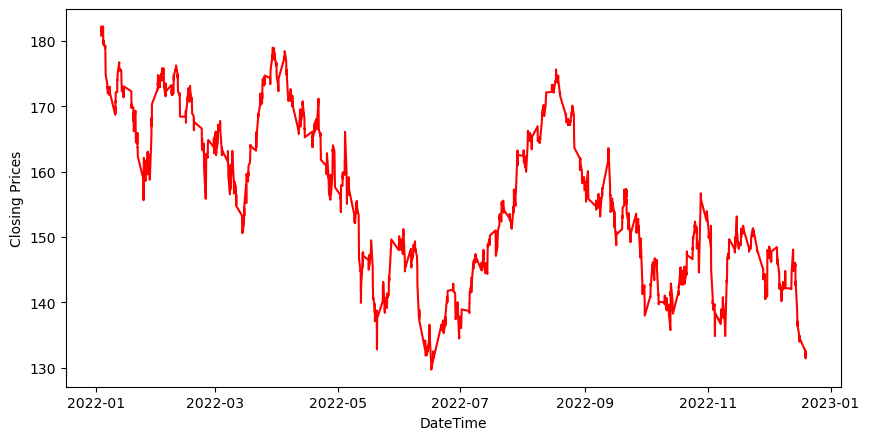

In [65]:
#plotting the closing price against the date
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('DateTime')
plt.ylabel('Closing Prices')
plt.plot(df.Close,color='red')
plt.show()

In [66]:
#TO BE CONTINUED